# Predicting Red Hat Business Value

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
people = pd.read_csv('/Users/najeebkhan/Desktop/Dataset/Red Hat/people.csv')
activity = pd.read_csv('/Users/najeebkhan/Desktop/Dataset/Red Hat/act_train.csv')

In [10]:
print 'Number of samples in peoples: {}'.format(len(people.index))
print 'Number of samples in activity: {}'.format(len(activity.index))
print 'Number of features in people: {}'.format(len(people.columns))
print 'Number of features in activity: {}'.format(len(activity.columns))

Number of samples in peoples: 189118
Number of samples in activity: 2197291
Number of features in people: 41
Number of features in activity: 15


In [7]:
people.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


In [37]:
people.columns = ['people_id','people_char_1','people_group_1','people_char_2','people_date']+\
['people_char_{}'.format(i) for i in range(3,len(people.columns)-2)]
people.head()

,people_id,people_char_1,people_group_1,people_char_2,people_date,people_char_3,people_char_4,people_char_5,people_char_6,people_char_7,...,people_char_29,people_char_30,people_char_31,people_char_32,people_char_33,people_char_34,people_char_35,people_char_36,people_char_37,people_char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


In [38]:
activity.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [39]:
people_activity = activity.merge(people,on='people_id',how='inner')

In [41]:
people_activity.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,...,people_char_29,people_char_30,people_char_31,people_char_32,people_char_33,people_char_34,people_char_35,people_char_36,people_char_37,people_char_38
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36


In [44]:
people_act_type1,people_act_not_type1 = people_activity[people_activity['activity_category'] == 'type 1'],\
people_activity[people_activity['activity_category'] != 'type 1']

In [45]:
people_act_type1.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,...,people_char_29,people_char_30,people_char_31,people_char_32,people_char_33,people_char_34,people_char_35,people_char_36,people_char_37,people_char_38
52,ppl_100025,act1_9923,2022-11-25,type 1,type 3,type 5,type 1,type 1,type 6,type 3,...,False,False,False,False,False,False,False,False,False,76
105,ppl_100033,act1_198174,2022-07-26,type 1,type 36,type 11,type 5,type 1,type 6,type 1,...,False,False,False,False,False,False,False,False,False,0
106,ppl_100033,act1_214090,2023-06-15,type 1,type 24,type 6,type 6,type 3,type 1,type 3,...,False,False,False,False,False,False,False,False,False,0
107,ppl_100033,act1_230588,2023-02-28,type 1,type 2,type 2,type 3,type 3,type 5,type 2,...,False,False,False,False,False,False,False,False,False,0
108,ppl_100033,act1_271874,2022-07-26,type 1,type 2,type 5,type 3,type 2,type 6,type 1,...,False,False,False,False,False,False,False,False,False,0


In [47]:
people_act_not_type1.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,...,people_char_29,people_char_30,people_char_31,people_char_32,people_char_33,people_char_34,people_char_35,people_char_36,people_char_37,people_char_38
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36


In [49]:
people_act_type1 = people_act_type1.drop(labels = ['char_10'],axis=1)
people_act_not_type1 = people_act_not_type1.drop(labels = ['char_{}'.format(i) for i in range(1,10)],axis=1)

In [57]:
people_act_not_type1 = people_act_not_type1.reset_index(drop=True)
people_act_type1 = people_act_type1.reset_index(drop=True)

In [58]:
people_act_type1.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,...,people_char_29,people_char_30,people_char_31,people_char_32,people_char_33,people_char_34,people_char_35,people_char_36,people_char_37,people_char_38
0,ppl_100025,act1_9923,2022-11-25,type 1,type 3,type 5,type 1,type 1,type 6,type 3,...,False,False,False,False,False,False,False,False,False,76
1,ppl_100033,act1_198174,2022-07-26,type 1,type 36,type 11,type 5,type 1,type 6,type 1,...,False,False,False,False,False,False,False,False,False,0
2,ppl_100033,act1_214090,2023-06-15,type 1,type 24,type 6,type 6,type 3,type 1,type 3,...,False,False,False,False,False,False,False,False,False,0
3,ppl_100033,act1_230588,2023-02-28,type 1,type 2,type 2,type 3,type 3,type 5,type 2,...,False,False,False,False,False,False,False,False,False,0
4,ppl_100033,act1_271874,2022-07-26,type 1,type 2,type 5,type 3,type 2,type 6,type 1,...,False,False,False,False,False,False,False,False,False,0


In [59]:
people_act_not_type1.head()

,people_id,activity_id,date,activity_category,char_10,outcome,people_char_1,people_group_1,people_char_2,people_date,...,people_char_29,people_char_30,people_char_31,people_char_32,people_char_33,people_char_34,people_char_35,people_char_36,people_char_37,people_char_38
0,ppl_100,act2_1734928,2023-08-26,type 4,type 76,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,2022-09-27,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,2022-09-27,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
3,ppl_100,act2_3651215,2023-08-04,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
4,ppl_100,act2_4109017,2023-08-26,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36


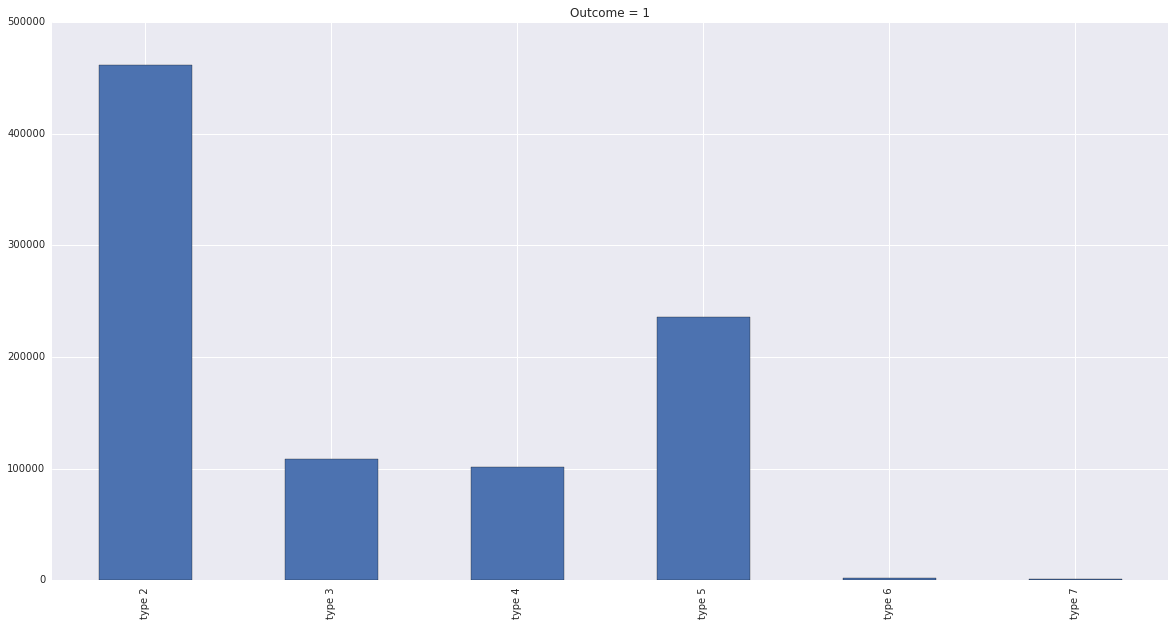

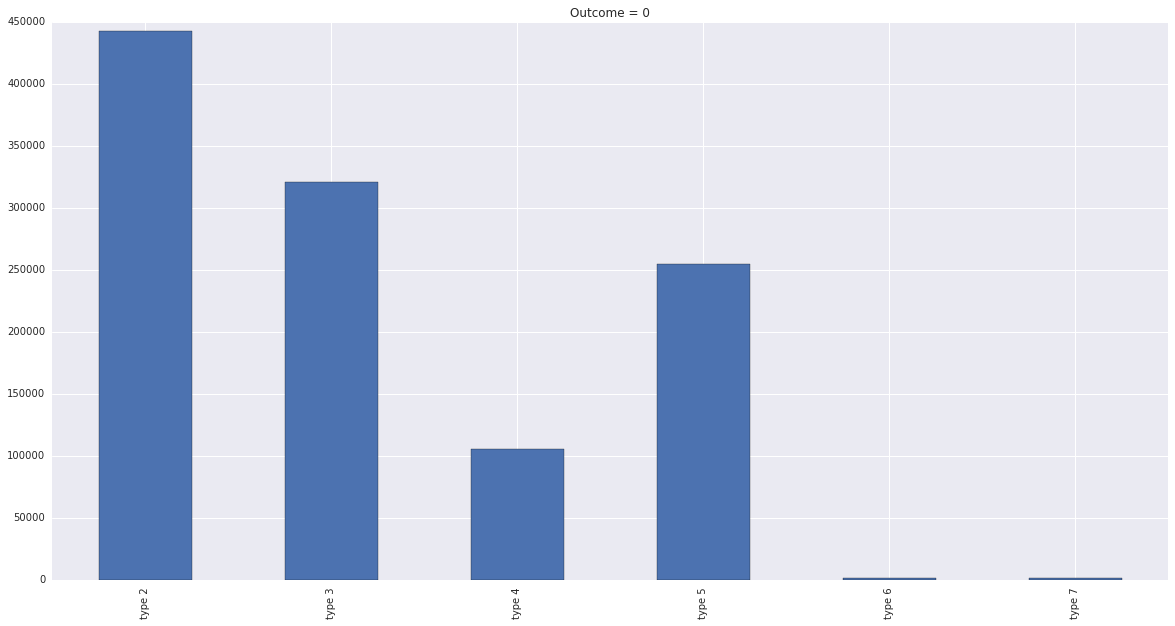

In [73]:
from collections import Counter
pd.Series(Counter(people_act_not_type1[people_act_not_type1['outcome'] == 1]['activity_category'])).\
plot(kind='bar',figsize=(20,10))
plt.title('Outcome = 1')
plt.show()
pd.Series(Counter(people_act_not_type1[people_act_not_type1['outcome'] == 0]['activity_category'])).\
plot(kind='bar',figsize=(20,10))
plt.title('Outcome = 0')
plt.show()

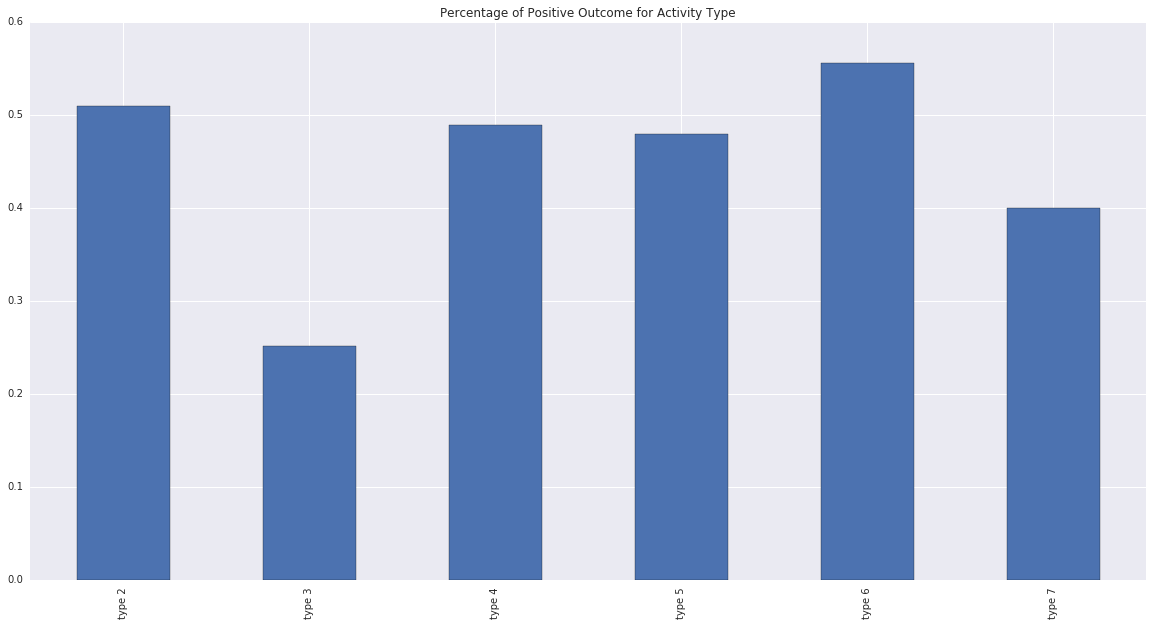

In [101]:
pd.Series(pd.Series(Counter(people_act_not_type1[people_act_not_type1['outcome'] == 1]['activity_category']))/\
pd.Series(Counter(people_act_not_type1['activity_category']))).plot(kind='bar',figsize=(20,10))
plt.title('Percentage of Positive Outcome for Activity Type')

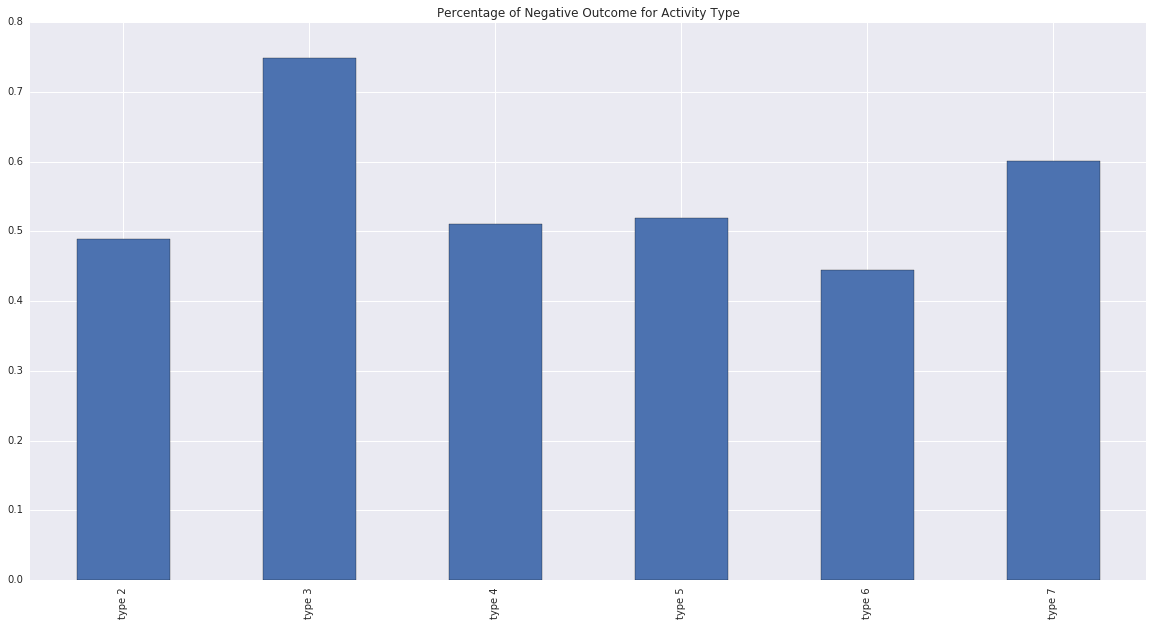

In [103]:
pd.Series(pd.Series(Counter(people_act_not_type1[people_act_not_type1['outcome'] == 0]['activity_category']))/\
pd.Series(Counter(people_act_not_type1['activity_category']))).plot(kind='bar',figsize=(20,10))
plt.title('Percentage of Negative Outcome for Activity Type')

In [141]:
df = people_act_type1.copy()
df.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,...,people_char_29,people_char_30,people_char_31,people_char_32,people_char_33,people_char_34,people_char_35,people_char_36,people_char_37,people_char_38
0,ppl_100025,act1_9923,2022-11-25,type 1,type 3,type 5,type 1,type 1,type 6,type 3,...,False,False,False,False,False,False,False,False,False,76
1,ppl_100033,act1_198174,2022-07-26,type 1,type 36,type 11,type 5,type 1,type 6,type 1,...,False,False,False,False,False,False,False,False,False,0
2,ppl_100033,act1_214090,2023-06-15,type 1,type 24,type 6,type 6,type 3,type 1,type 3,...,False,False,False,False,False,False,False,False,False,0
3,ppl_100033,act1_230588,2023-02-28,type 1,type 2,type 2,type 3,type 3,type 5,type 2,...,False,False,False,False,False,False,False,False,False,0
4,ppl_100033,act1_271874,2022-07-26,type 1,type 2,type 5,type 3,type 2,type 6,type 1,...,False,False,False,False,False,False,False,False,False,0


In [142]:
df = df.drop(labels = ['activity_category','people_id','activity_id'],axis=1)

In [150]:
df.head()

,date,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,...,people_char_29,people_char_30,people_char_31,people_char_32,people_char_33,people_char_34,people_char_35,people_char_36,people_char_37,people_char_38
0,2022-11-25,type 3,type 5,type 1,type 1,type 6,type 3,type 3,type 6,type 8,...,False,False,False,False,False,False,False,False,False,76
1,2022-07-26,type 36,type 11,type 5,type 1,type 6,type 1,type 1,type 4,type 1,...,False,False,False,False,False,False,False,False,False,0
2,2023-06-15,type 24,type 6,type 6,type 3,type 1,type 3,type 4,type 5,type 1,...,False,False,False,False,False,False,False,False,False,0
3,2023-02-28,type 2,type 2,type 3,type 3,type 5,type 2,type 2,type 4,type 2,...,False,False,False,False,False,False,False,False,False,0
4,2022-07-26,type 2,type 5,type 3,type 2,type 6,type 1,type 1,type 6,type 8,...,False,False,False,False,False,False,False,False,False,0


In [155]:
df.date = pd.to_datetime(df.date)
df.date.dtypes

dtype('<M8[ns]')

In [189]:
### df['vertebrates'] = df.vertebrates.astype("category").cat.codes

In [159]:
for i in range(1,10):
    df['char_{}'.format(i)] = df['char_{}'.format(i)].astype("category").cat.codes

In [160]:
df.head()

,date,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,...,people_char_29,people_char_30,people_char_31,people_char_32,people_char_33,people_char_34,people_char_35,people_char_36,people_char_37,people_char_38
0,2022-11-25,22,27,0,0,5,2,2,14,17,...,False,False,False,False,False,False,False,False,False,76
1,2022-07-26,29,2,6,0,5,0,0,12,0,...,False,False,False,False,False,False,False,False,False,0
2,2023-06-15,16,28,7,2,0,2,3,13,0,...,False,False,False,False,False,False,False,False,False,0
3,2023-02-28,11,11,4,2,4,1,1,12,11,...,False,False,False,False,False,False,False,False,False,0
4,2022-07-26,11,27,4,1,5,0,0,14,17,...,False,False,False,False,False,False,False,False,False,0


In [161]:
for i in range(1,39):
    df['people_char_{}'.format(i)] = df['people_char_{}'.format(i)].astype("category").cat.codes

In [162]:
df.head()

,date,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,...,people_char_29,people_char_30,people_char_31,people_char_32,people_char_33,people_char_34,people_char_35,people_char_36,people_char_37,people_char_38
0,2022-11-25,22,27,0,0,5,2,2,14,17,...,0,0,0,0,0,0,0,0,0,76
1,2022-07-26,29,2,6,0,5,0,0,12,0,...,0,0,0,0,0,0,0,0,0,0
2,2023-06-15,16,28,7,2,0,2,3,13,0,...,0,0,0,0,0,0,0,0,0,0
3,2023-02-28,11,11,4,2,4,1,1,12,11,...,0,0,0,0,0,0,0,0,0,0
4,2022-07-26,11,27,4,1,5,0,0,14,17,...,0,0,0,0,0,0,0,0,0,0


In [163]:
df['people_group_1'] = df['people_group_1'].astype("category").cat.codes

In [166]:
df['people_date'] = pd.to_datetime(df['people_date'])

In [188]:
df1 = df.drop(labels = ['date','people_date'],axis=1)

In [168]:
from pandas.tools.plotting import andrews_curves

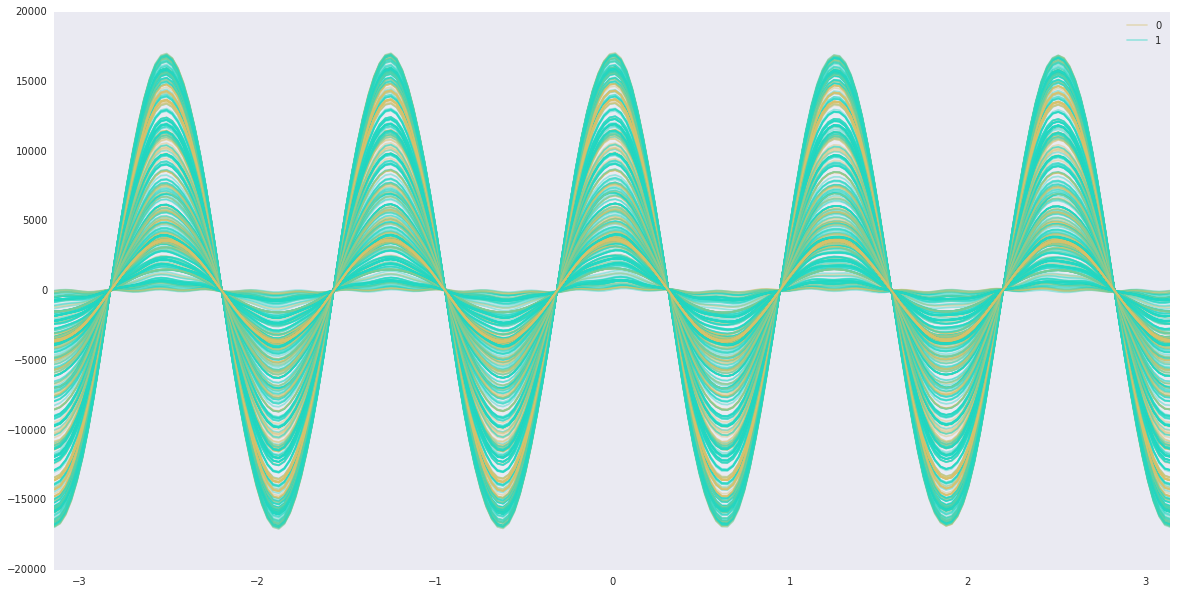

In [177]:
andrews_curves(df1.head(1000),'',figsize(20,10),alpha=0.4)

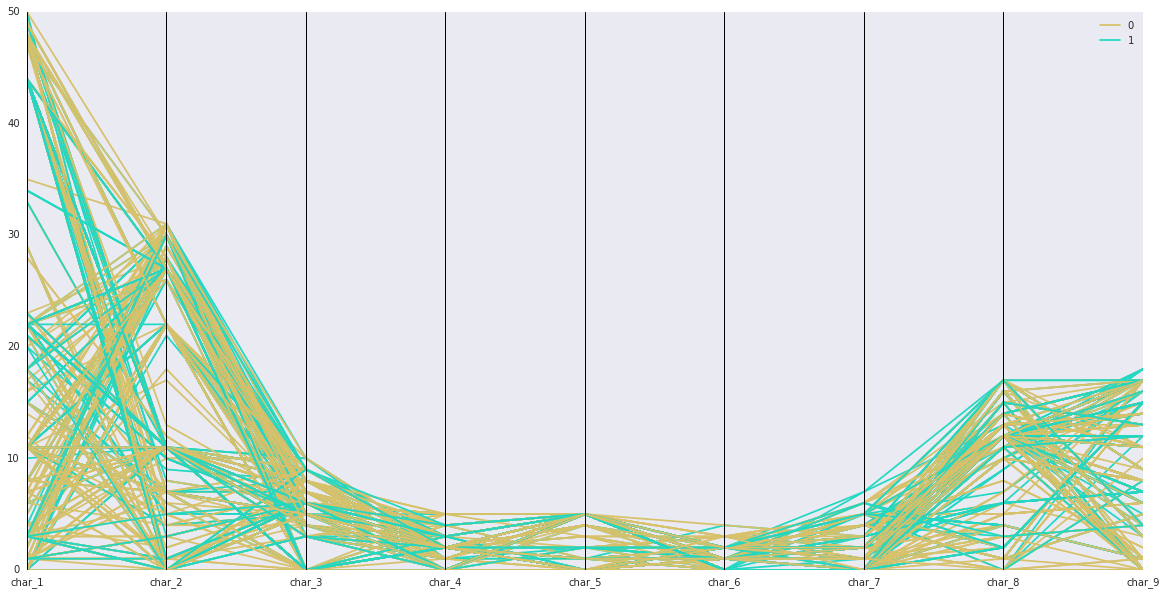

In [187]:
from pandas.tools.plotting import parallel_coordinates
df2 = df1.drop(labels = ['people_group_1','people_char_38'],axis=1)
parallel_coordinates(df2.iloc[:,0:10].head(1000),'outcome')

In [191]:
df.head()

,date,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,...,people_char_29,people_char_30,people_char_31,people_char_32,people_char_33,people_char_34,people_char_35,people_char_36,people_char_37,people_char_38
0,2022-11-25,22,27,0,0,5,2,2,14,17,...,0,0,0,0,0,0,0,0,0,76
1,2022-07-26,29,2,6,0,5,0,0,12,0,...,0,0,0,0,0,0,0,0,0,0
2,2023-06-15,16,28,7,2,0,2,3,13,0,...,0,0,0,0,0,0,0,0,0,0
3,2023-02-28,11,11,4,2,4,1,1,12,11,...,0,0,0,0,0,0,0,0,0,0
4,2022-07-26,11,27,4,1,5,0,0,14,17,...,0,0,0,0,0,0,0,0,0,0


In [204]:
### Training for type 1 type of activity
df_train = df.drop(labels = ['date','people_group_1','people_date'],axis=1)
y_train = df_train['outcome'].values
y_train.shape
df_train = df_train.drop(labels=['outcome'],axis=1)

In [205]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157615 entries, 0 to 157614
Data columns (total 47 columns):
char_1            157615 non-null int8
char_2            157615 non-null int8
char_3            157615 non-null int8
char_4            157615 non-null int8
char_5            157615 non-null int8
char_6            157615 non-null int8
char_7            157615 non-null int8
char_8            157615 non-null int8
char_9            157615 non-null int8
people_char_1     157615 non-null int8
people_char_2     157615 non-null int8
people_char_3     157615 non-null int8
people_char_4     157615 non-null int8
people_char_5     157615 non-null int8
people_char_6     157615 non-null int8
people_char_7     157615 non-null int8
people_char_8     157615 non-null int8
people_char_9     157615 non-null int8
people_char_10    157615 non-null int8
people_char_11    157615 non-null int8
people_char_12    157615 non-null int8
people_char_13    157615 non-null int8
people_char_14    157615 non-nu

In [206]:
### df = pd.get_dummies(df,columns=['vertebrates'])
df_train = pd.get_dummies(df_train,columns=['char_{}'.format(i) for i in range(1,10)])

In [207]:
df_train = pd.get_dummies(df_train,columns=['people_char_{}'.format(i) for i in range(1,39)])

In [209]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157615 entries, 0 to 157614
Columns: 445 entries, char_1_0 to people_char_38_100
dtypes: float64(445)
memory usage: 535.1 MB


In [210]:
X = df_train.values
print X.shape

(157615, 445)


In [214]:
X_train = X[0:100000,:]
y = y_train[0:100000]
X_cv = X[100000:,:]
y_cv = y_train[100000:]
print X_train.shape,y.shape
print X_cv.shape,y_cv.shape

(100000, 445) (100000,)
(57615, 445) (57615,)


In [215]:
from sklearn import svm

In [218]:
svc = svm.SVC(C=100,kernel='rbf')